<a href="https://colab.research.google.com/github/superweark1/Earl-Sonnie-Andrew-S.-Plecerda/blob/main/Lab_Exercise2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
from google.colab import drive
drive.mount('/content/gdrive')


Mounted at /content/gdrive


In [4]:
#1
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


In [2]:
file_path = '/content/gdrive/MyDrive/lab exercise 2/loans.csv'



In [82]:
#2
df = pd.read_csv(file_path, index_col='client_id')
print(df.head())


          loan_type  loan_amount  repaid  loan_id  loan_start    loan_end  \
client_id                                                                   
46109          home        13672       0    10243  2002-04-16  2003-12-20   
46109        credit         9794       0    10984  2003-10-21  2005-07-17   
46109          home        12734       1    10990  2006-02-01  2007-07-05   
46109          cash        12518       1    10596  2010-12-08  2013-05-05   
46109        credit        14049       1    11415  2010-07-07  2012-05-21   

           rate  
client_id        
46109      2.15  
46109      1.25  
46109      0.68  
46109      1.24  
46109      3.13  


In [8]:
#3
df.head()


,loan_type,loan_amount,repaid,loan_id,loan_start,loan_end,rate
client_id,,,,,,,
46109,home,13672,0,10243,2002-04-16,2003-12-20,2.15
46109,credit,9794,0,10984,2003-10-21,2005-07-17,1.25
46109,home,12734,1,10990,2006-02-01,2007-07-05,0.68
46109,cash,12518,1,10596,2010-12-08,2013-05-05,1.24
46109,credit,14049,1,11415,2010-07-07,2012-05-21,3.13


In [9]:
#4
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 443 entries, 46109 to 26945
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   loan_type    443 non-null    object 
 1   loan_amount  443 non-null    int64  
 2   repaid       443 non-null    int64  
 3   loan_id      443 non-null    int64  
 4   loan_start   443 non-null    object 
 5   loan_end     443 non-null    object 
 6   rate         443 non-null    float64
dtypes: float64(1), int64(3), object(3)
memory usage: 27.7+ KB


In [ ]:
#5
missing_values = df.isnull().sum()


print("Missing Values per Column:")
print(missing_values)


Missing Values per Column:
loan_type      0
loan_amount    0
repaid         0
loan_id        0
loan_start     0
loan_end       0
rate           0
dtype: int64


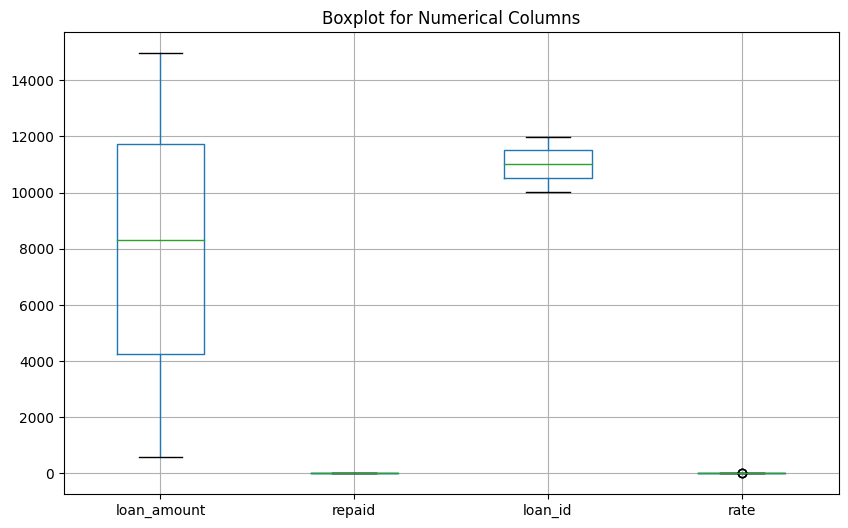

In [10]:
#6
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
df.boxplot()
plt.title('Boxplot for Numerical Columns')
plt.show()


In [85]:
#7
from scipy.stats import zscore
import numpy as np


numeric_columns = df.select_dtypes(include=[np.number]).columns


df_sqrt = df.copy()
df_sqrt[numeric_columns] = df_sqrt[numeric_columns].apply(np.sqrt)

numeric_columns = df.select_dtypes(include=[np.number]).columns
z_scores = df[numeric_columns].apply(zscore)

threshold = 3
outliers = (z_scores > threshold) | (z_scores < -threshold)

df_sqrt = df.copy()
df_sqrt[numeric_columns] = df_sqrt[numeric_columns].apply(np.sqrt)

df_capped = df.mask(outliers, df.mean(), axis=1)

print("Original DataFrame:")
print(df.head())

print("\nDataFrame after SQRT transformation:")
print(df_sqrt.head())

print("\nDataFrame after Z-Score capping:")
print(df_capped.head())

Original DataFrame:
          loan_type  loan_amount  repaid  loan_id  loan_start    loan_end  \
client_id                                                                   
46109          home        13672       0    10243  2002-04-16  2003-12-20   
46109        credit         9794       0    10984  2003-10-21  2005-07-17   
46109          home        12734       1    10990  2006-02-01  2007-07-05   
46109          cash        12518       1    10596  2010-12-08  2013-05-05   
46109        credit        14049       1    11415  2010-07-07  2012-05-21   

           rate  
client_id        
46109      2.15  
46109      1.25  
46109      0.68  
46109      1.24  
46109      3.13  

DataFrame after SQRT transformation:
          loan_type  loan_amount  repaid     loan_id  loan_start    loan_end  \
client_id                                                                      
46109          home   116.927328     0.0  101.207707  2002-04-16  2003-12-20   
46109        credit    98.964640    

Skewness of loan_amount: -0.039979264387749625
Kurtosis of loan_amount: -1.231750031487528


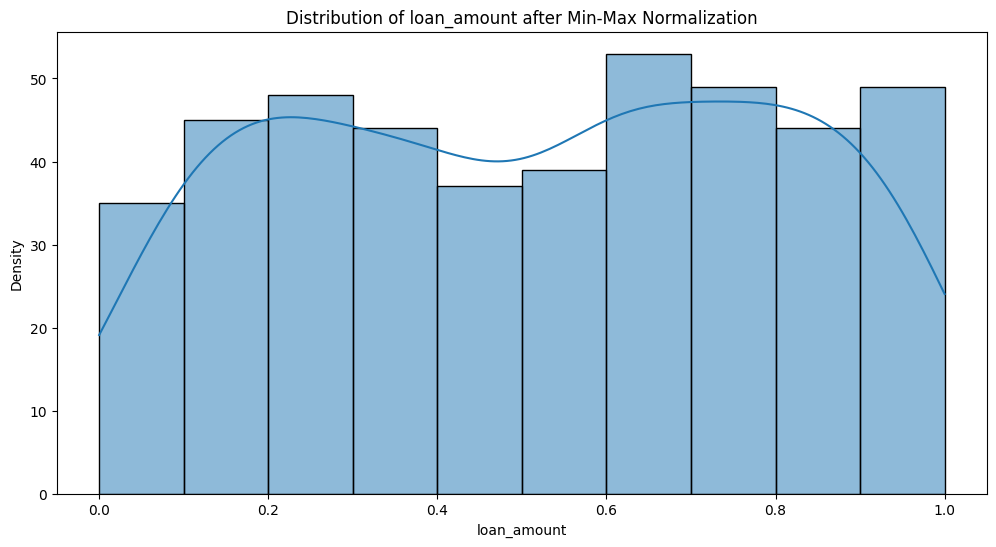

In [12]:
#8
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
from scipy.stats import skew, kurtosis

numeric_columns = df.select_dtypes(include=[np.number]).columns

scaler = MinMaxScaler()
df_scaled = df.copy()
df_scaled[numeric_columns] = scaler.fit_transform(df[numeric_columns])

loan_amount_col = 'loan_amount'
loan_amount_skewness = skew(df_scaled[loan_amount_col])
loan_amount_kurtosis = kurtosis(df_scaled[loan_amount_col])

print(f'Skewness of {loan_amount_col}: {loan_amount_skewness}')
print(f'Kurtosis of {loan_amount_col}: {loan_amount_kurtosis}')


plt.figure(figsize=(12, 6))
sns.histplot(df_scaled[loan_amount_col], kde=True)
plt.title(f'Distribution of {loan_amount_col} after Min-Max Normalization')
plt.xlabel(loan_amount_col)
plt.ylabel('Density')
plt.show()


In [13]:
#9
import pandas as pd

categorical_columns = df.select_dtypes(include=[object]).columns

df_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

df_encoded.head()



,loan_amount,repaid,loan_id,rate,loan_type_credit,loan_type_home,loan_type_other,loan_start_2000-03-06,loan_start_2000-03-08,loan_start_2000-03-25,...,loan_end_2016-11-14,loan_end_2016-11-27,loan_end_2016-12-10,loan_end_2016-12-29,loan_end_2017-01-16,loan_end_2017-01-19,loan_end_2017-01-26,loan_end_2017-01-29,loan_end_2017-02-15,loan_end_2017-05-07
client_id,,,,,,,,,,,,,,,,,,,,,
46109,13672,0,10243,2.15,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
46109,9794,0,10984,1.25,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
46109,12734,1,10990,0.68,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
46109,12518,1,10596,1.24,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
46109,14049,1,11415,3.13,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
#10
df['loan_start'] = pd.to_datetime(df['loan_start'])
df['loan_end'] = pd.to_datetime(df['loan_end'])


df['loan_tenure'] = (df['loan_end'] - df['loan_start']).dt.days

df[['loan_start', 'loan_end', 'loan_tenure']].head()


,loan_start,loan_end,loan_tenure
client_id,,,
46109,2002-04-16,2003-12-20,613
46109,2003-10-21,2005-07-17,635
46109,2006-02-01,2007-07-05,519
46109,2010-12-08,2013-05-05,879
46109,2010-07-07,2012-05-21,684


In [78]:
#11
import pandas as pd
from sklearn.model_selection import train_test_split


file_path = '/content/gdrive/MyDrive/lab exercise 2/loans.csv'

df = pd.read_csv(file_path)

X = df.drop('repaid', axis=1)
y = df['repaid']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)
print("X_train head:\n", X_train.head())
print("y_train head:\n", y_train.head())
print("X_test head:\n", X_test.head())
print("y_test head:\n", y_test.head())


X_train shape: (354, 7)
X_test shape: (89, 7)
y_train shape: (354,)
y_test shape: (89,)
X_train head:
      client_id loan_type  loan_amount  loan_id  loan_start    loan_end  rate
17       46109     other        10067    10422  2004-04-05  2006-10-13  3.12
66       46180    credit         9216    11837  2002-06-17  2004-11-14  3.20
248      29841      home         4241    10589  2006-01-20  2008-07-17  2.60
246      29841      home        13862    11730  2013-03-12  2015-12-01  6.11
31       49545      home         7061    11514  2014-03-16  2015-12-30  4.23
y_train head:
 17     1
66     1
248    0
246    0
31     1
Name: repaid, dtype: int64
X_test head:
      client_id loan_type  loan_amount  loan_id  loan_start    loan_end  rate
333      39384    credit         9582    11067  2008-05-29  2010-01-13  2.17
137      32726    credit         7499    10285  2012-10-07  2015-03-12  2.72
72       46180      cash         2628    10038  2000-06-18  2002-04-06  3.14
364      26695    credit  